# Домашнее задание к лекции "Статистика. Практика"

## Задание 1

Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/vgsales.csv).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?  
2) Критикам нравятся больше игры на PC или на PS4?  
3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:
- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import re

In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
df_prep = df[['Platform', 'Genre', 'Critic_Score']].dropna()

In [4]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8137 entries, 0 to 16709
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      8137 non-null   object 
 1   Genre         8137 non-null   object 
 2   Critic_Score  8137 non-null   float64
dtypes: float64(1), object(2)
memory usage: 254.3+ KB


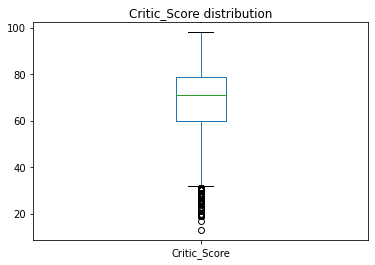

In [5]:
# Хотя в данных по расчету и имеются выбросы, но объективно - оценки критиков могут быть от 0 до 100, поэтому расчетные выбросы
# оставляем.
df_prep = df_prep[df_prep['Critic_Score'] >= 0]
df_prep['Critic_Score'].plot(kind='box',
                   title='Critic_Score distribution');

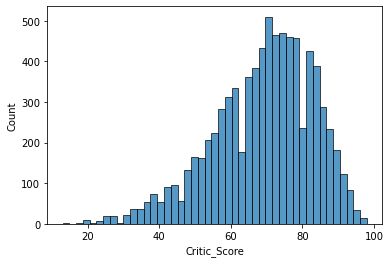

In [6]:
sns.histplot(df_prep.Critic_Score);

**1. Как критики относятся к спортивным играм.**  
Формулируем гипотезы:   
Н0 - критикам нравятся спортивные игры - средняя оценка >= 50%   
H1 - критикам не нравятся спортивные игры - средняя оценка < 50%

In [7]:
df_prep['Genre'].unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

In [8]:
df_sport = df_prep[df_prep['Genre'] == 'Sports']

In [9]:
alpha = 0.05
result = st.ttest_1samp(df_sport['Critic_Score'], 50, alternative='less')

if result.pvalue < alpha:
    print(f'Отвергаем нулевую гипотезу, среднее равно {round(df_sport["Critic_Score"].mean(),2)}, что меньше 50, критикам не нравятся спортивные игры.')
else:
    print(f'Не отвергаем нулевую гипотезу, среднее равно {round(df_sport["Critic_Score"].mean(),2)}, что больше 50, критикам нравятся спортивные игры.')

Не отвергаем нулевую гипотезу, среднее равно 71.97, что больше 50, критикам нравятся спортивные игры.


**2. Критикам нравятся больше игры на PC или на PS4?**  
Формулируем гипотезы:  
Н0 - критикам нравятся обе платформы одинаково.  
H1 - у критиков есть предпочтения.

In [10]:
df_prep['Platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC',
       'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

In [11]:
df_PC = df_prep[df_prep['Platform'] == 'PC']

In [12]:
df_PS4 = df_prep[df_prep['Platform'] == 'PS4']

In [13]:
result = st.ttest_ind(df_PC['Critic_Score'], df_PS4['Critic_Score'], equal_var=False)
alpha = 0.05
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу,  у критиков есть предпочтения')
else:
    print('Не отвергаем нулевую гипотезу, критикам нравятся обе платформы одинаково')
print(f"Так как средняя оценка по играм на PC равна {round(df_PC['Critic_Score'].mean(),2)} и больше чем средняя оценка на PS4 равная {round(df_PS4['Critic_Score'].mean(),2)} то делаем вывод, что предпочтения критиков отданы PC.")

Ttest_indResult(statistic=4.3087588262138725, pvalue=2.067249157283479e-05)
Отвергаем нулевую гипотезу,  у критиков есть предпочтения
Так как средняя оценка по играм на PC равна 75.93 и больше чем средняя оценка на PS4 равная 72.09 то делаем вывод, что предпочтения критиков отданы PC.


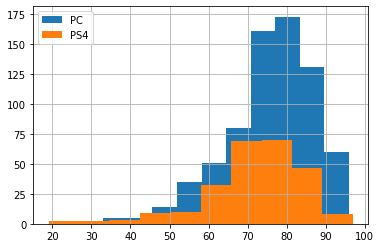

In [14]:
df_PC.Critic_Score.hist(label='PC')
df_PS4.Critic_Score.hist(label='PS4')
plt.legend(loc=2);

**3. Критикам больше нравятся стрелялки или стратегии?**  
Формулируем гипотезы:  
Н0 - критики - геймеры - маньяки и им нравятся одинаково оба жанра.  
H1 - у критиков есть предпочтения.

In [15]:
df_Shooter = df_prep[df_prep['Genre'] == 'Shooter']

In [16]:
df_Strategy = df_prep[df_prep['Genre'] == 'Strategy']

In [17]:
result = st.ttest_ind(df_Shooter['Critic_Score'], df_Strategy['Critic_Score'], equal_var=False)
alpha = 0.05
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу,  у критиков есть предпочтения')
else:
    print('Не отвергаем нулевую гипотезу, критики - игроманы')
print(f"Так как средняя оценка по стратегиям равна {round(df_Strategy['Critic_Score'].mean(),2)} и больше чем средняя оценка по стрелялкам равная {round(df_Shooter['Critic_Score'].mean(),2)} то делаем вывод, что критики - серьезные люди и предпочитают стратегии, хотя если бы порог значимости составлял 1% то можно было бы сделать вывод о том, что критикам жанр игры вообще не важен.")

Ttest_indResult(statistic=-2.2972408230640315, pvalue=0.021938989522304823)
Отвергаем нулевую гипотезу,  у критиков есть предпочтения
Так как средняя оценка по стратегиям равна 72.09 и больше чем средняя оценка по стрелялкам равная 70.18 то делаем вывод, что критики - серьезные люди и предпочитают стратегии, хотя если бы порог значимости составлял 1% то можно было бы сделать вывод о том, что критикам жанр игры вообще не важен.


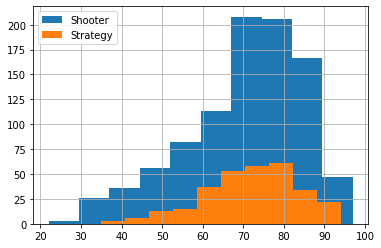

In [18]:
df_Shooter.Critic_Score.hist(label='Shooter')
df_Strategy.Critic_Score.hist(label='Strategy')
plt.legend(loc=2);

## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

1) Приведите весь текст к нижнему регистру;  
2) Удалите мусорные символы;  
3) Удалите стоп-слова;  
4) Привидите все слова к нормальной форме;  
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```

Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);

6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html); 

7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных;  

8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix); 

9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [19]:
messages = pd.read_csv('spam.csv')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [20]:
messages['Message'] = messages['Message'].apply(lambda mes: mes.lower())
messages

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ü b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


In [21]:
messages['Message'] = messages['Message'].apply(lambda mes: re.sub('[\W_]+',' ', mes))
messages

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ü b going to esplanade fr home
5569,ham,pity was in mood for that so any other suggest...
5570,ham,the guy did some bitching but i acted like i d...


In [22]:
messages['Message'] = messages['Message'].apply(lambda message: message.split())

In [23]:
messages

,Category,Message
0,ham,"[go, until, jurong, point, crazy, available, o..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"[nah, i, don, t, think, he, goes, to, usf, he,..."
...,...,...
5567,spam,"[this, is, the, 2nd, time, we, have, tried, 2,..."
5568,ham,"[will, ü, b, going, to, esplanade, fr, home]"
5569,ham,"[pity, was, in, mood, for, that, so, any, othe..."
5570,ham,"[the, guy, did, some, bitching, but, i, acted,..."


In [24]:
import nltk
from nltk.corpus import stopwords

In [25]:
stopwords_set = set(stopwords.words('english'))

In [26]:
messages['Message'] = messages['Message'].apply(lambda string: [word for word in string if word not in stopwords_set])

In [27]:
messages

,Category,Message
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, think, goes, usf, lives, around, though]"
...,...,...
5567,spam,"[2nd, time, tried, 2, contact, u, u, 750, poun..."
5568,ham,"[ü, b, going, esplanade, fr, home]"
5569,ham,"[pity, mood, suggestions]"
5570,ham,"[guy, bitching, acted, like, interested, buyin..."


In [28]:
from nltk.stem import WordNetLemmatizer

In [29]:
wordnet_lemmatizer = WordNetLemmatizer()
messages['Message'] = messages['Message'].apply(lambda string: [wordnet_lemmatizer.lemmatize(word) for word in string])

In [30]:
messages

,Category,Message
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, think, go, usf, life, around, though]"
...,...,...
5567,spam,"[2nd, time, tried, 2, contact, u, u, 750, poun..."
5568,ham,"[ü, b, going, esplanade, fr, home]"
5569,ham,"[pity, mood, suggestion]"
5570,ham,"[guy, bitching, acted, like, interested, buyin..."


In [31]:
messages['Message'] = messages['Message'].apply(lambda string: ' '.join(string))

In [32]:
messages

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though
...,...,...
5567,spam,2nd time tried 2 contact u u 750 pound prize 2...
5568,ham,ü b going esplanade fr home
5569,ham,pity mood suggestion
5570,ham,guy bitching acted like interested buying some...


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(messages.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

In [35]:
tfidf_matrix['go']

0       0.154894
1       0.000000
2       0.000000
3       0.000000
4       0.255272
          ...   
5567    0.000000
5568    0.000000
5569    0.000000
5570    0.000000
5571    0.000000
Name: go, Length: 5572, dtype: float64

In [36]:
df = tfidf_matrix.join(messages['Category'])

In [37]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, messages['Category'], test_size=0.3, random_state=42)

In [38]:
# импортируем и строим модель
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

In [39]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test.values, lr.predict(X_test)]).T
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1672 non-null   object
 1   1       1672 non-null   object
dtypes: object(2)
memory usage: 26.2+ KB


In [40]:
result['dif'] = np.where(result[0] == result[1], 0, 1)

In [41]:
result[result['dif'] == 1]

,0,1,dif
17,ham,spam,1
40,spam,ham,1
47,spam,ham,1
74,spam,ham,1
84,spam,ham,1
...,...,...,...
1525,spam,ham,1
1567,spam,ham,1
1569,spam,ham,1
1576,ham,spam,1


In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test, lr.predict(X_test))

0.958732057416268

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
confusion_matrix(y_test, lr.predict(X_test), labels=["ham", "spam"])

array([[1445,    3],
       [  66,  158]], dtype=int64)

1445 раз модель правильно классифицировала не спам, 3 раза модель неправильно классифицировала не спам как спам,   
66 раз модель неправильно классифицировала спам как не спам, 158 раз модель правильно классифицировала спам.

In [46]:
Accuracy = (1445 + 158)/(1445 + 3 + 66 + 158)
Accuracy

0.958732057416268

In [47]:
Recall = 1445/(1445+3)
Recall

0.9979281767955801

модели можно доверять в ее способности обнаруживать не спам

In [48]:
Precision = 1445 / (1445 + 66)
Precision

0.9563203176704169

утверждения модели о том, что сообщение относится к классу не спам, корректны с точностью 95,6%.

In [49]:
specificity = 158 / (158 + 66)
specificity

0.7053571428571429

а вот способность обнаруживать спам гораздо ниже - 70,5%

In [50]:
Predict_Category = pd.Series(lr.predict(X_test)).rename("Predict_Category")
Predict_Category

0        ham
1        ham
2        ham
3        ham
4        ham
        ... 
1667     ham
1668    spam
1669     ham
1670    spam
1671     ham
Name: Predict_Category, Length: 1672, dtype: object

In [51]:
import copy

In [52]:
dif_df = copy.copy(y_test)

In [53]:
dif_df = dif_df.reset_index()
dif_df

,index,Category
0,3245,ham
1,944,ham
2,1044,ham
3,2484,ham
4,812,ham
...,...,...
1667,2505,ham
1668,2525,spam
1669,4975,ham
1670,650,spam


In [54]:
dif_df = dif_df.join(Predict_Category)

In [55]:
dif_df = dif_df.set_index('index')

In [56]:
df = pd.read_csv('spam.csv')

In [57]:
dif_df = dif_df.join(df['Message'])

In [58]:
dif_df = dif_df[dif_df['Category'] != dif_df['Predict_Category']].reset_index()
dif_df

,index,Category,Predict_Category,Message
0,2952,ham,spam,Hey now am free you can call me.
1,881,spam,ham,Reminder: You have not downloaded the content ...
2,1961,spam,ham,Guess what! Somebody you know secretly fancies...
3,3864,spam,ham,Oh my god! I've found your number again! I'm s...
4,2575,spam,ham,Your next amazing xxx PICSFREE1 video will be ...
...,...,...,...,...
64,4543,spam,ham,FreeMsg Hi baby wow just got a new cam moby. W...
65,752,spam,ham,You have an important customer service announc...
66,309,spam,ham,TheMob> Check out our newest selection of cont...
67,495,ham,spam,Are you free now?can i call now?


#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам?
Прежде чем задать вопрос необходимо попробовать найти ответ самому в интернете. Навык самостоятельного поиска информации – один из важнейших, и каждый практикующий специалист любого уровня это делает каждый день.

Любой вопрос должен быть сформулирован по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности, прикрепляйте к вопросу скриншоты, либо ссылки на код. Оставляйте только проблемный и воспроизводимый участок кода, все решение выкладывать не допускается.
